In [28]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.optimizers import Adam
from keras.callbacks import CSVLogger
from keras import backend
from numpy import asarray
from matplotlib import pyplot
import math
import pylab
import random
import numpy as np
import pandas as pd
import time
import random
import csv

In [29]:
# Globals and Funcs

# Path to training file
TRAIN_FILE = "data/train.csv"
# Path to model file - weights will be saved here
MODEL_FILE = "data/sin-model"
# Model log file
LOG_FILE = 'data/training-log.csv'

# Number of Epochs to train for 1 (Epoch = 1 presentation of the training data)
EPOCHS = 10



# Define the lists that will hold the training data
train_x = [] # x-axis values
train_y = [] # y-axis values

In [30]:
# Load the training data from file
with open(TRAIN_FILE, 'r') as csvfile:
    input_data = csv.reader(csvfile, delimiter=',')
    for row in input_data:
        train_x.append(float(row[0]))
        train_y.append(float(row[1]))

In [31]:
# Prepare the training data for presentation to the neural network

# Convert the lists to numpy arrays, helps with manipulation
train_x = asarray(train_x)
train_y = asarray(train_y)
# Print the min and max just for info
print("Min Max before scaling...")
print(train_x.min(), train_x.max(), train_y.min(), train_y.max())

# Reshape arrays into into rows and cols
# we need to do this to present info to the network
train_x = train_x.reshape((len(train_x), 1))
train_y = train_y.reshape((len(train_y), 1))

# Scale the training data to values between 0 and 1
# this helps the network to train and stops any one 
# value from dominating the input
scale_x = MinMaxScaler()
scale_y = MinMaxScaler()
train_x = scale_x.fit_transform(train_x)
train_y = scale_y.fit_transform(train_y)

# Print the min and max just for info
print("Min Max after scaling...")
print(train_x.min(), train_x.max(), train_y.min(), train_y.max())

Min Max before scaling...
0.0 9.999 -0.768069 0.655349
Min Max after scaling...
0.0 1.0 0.0 1.0


In [32]:
# Design the neural network model

# Clear any exiting network models
backend.clear_session()
# Create a standard feedforward layered network
model = Sequential()

model.add(Dense(2, input_dim=1, activation='relu', kernel_initializer='he_uniform'))

# Create the output layer with a single node
model.add(Dense(1))


# Setup the learning algorithm loss function - Standard Gradient Descent (Backpop) with learning rate and momentum
opt = SGD(learning_rate=0.1, momentum=0.1)


# Compile the model - this builds the model and makes it ready for use
model.compile(loss='mse', optimizer=opt, metrics=['accuracy'])
# Setup a log file for the model metrics error and accuracy
csv_logger = CSVLogger(LOG_FILE)
# Start a timer to time the training
start = time.time()
print("Training, please wait.........")
# Fit the model - train the network on the training data
model.fit(train_x, train_y, epochs=EPOCHS, verbose=0, callbacks=[csv_logger])
end = time.time() - start
print("Training finished...in ", end, " seconds.")
# Save the model to file
#model.save(MODEL_FILE)

Training, please wait.........
Training finished...in  3.2054343223571777  seconds.


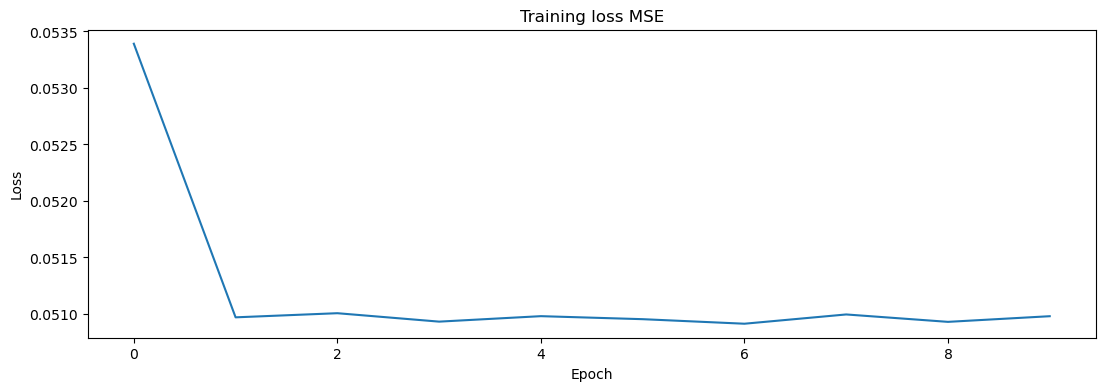

In [33]:
# Load the training log file and graph the reduction in error/loss
training_df = pd.read_csv(LOG_FILE)
# Plot the model error during training
ax = training_df['loss'].plot(title='Training loss MSE', figsize=(13.0, 4.0))
ax.set_xlabel('Epoch')
ax.set_ylabel('Loss')
pyplot.savefig("figs/training_mse.pdf")

313/313 [==============================] - 1s 856us/step
Mean Squared Error (MSE): 0.050767


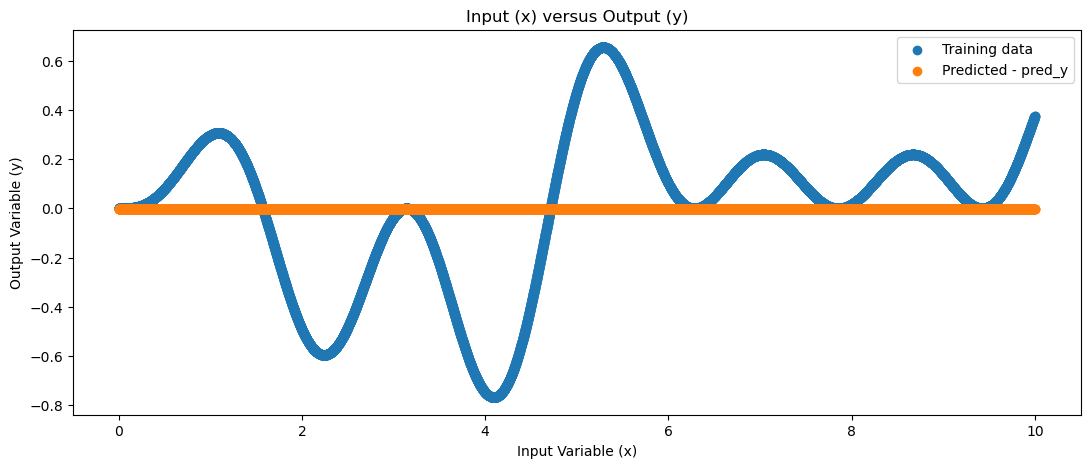

In [34]:
# Let's see how the training went by plotting the predications based on the training data.
# So we are going to get the network to predict the y values form the x values
pred_y = model.predict(train_x)

# report model error
print('Mean Squared Error (MSE): %.6f' % mean_squared_error(pred_y, train_y))


# We need to inverse the scaling to plot the data
train_x_final = scale_x.inverse_transform(train_x)
train_y_final = scale_y.inverse_transform(train_y)
# The predicted y values will need to be scaled back to 0 - 10
pred_y_final = scale_y.inverse_transform(pred_y)

# plot x vs y
pyplot.scatter(train_x_final, train_y_final, label='Training data')
# plot x vs predicated y
pyplot.scatter(train_x_final, pred_y_final, label='Predicted - pred_y')
pyplot.title('Input (x) versus Output (y)')
pyplot.xlabel('Input Variable (x)')
pyplot.ylabel('Output Variable (y)')
pyplot.legend()
pyplot.savefig("figs/sinwave_result_train.jpg")
pyplot.show()